<center><h1 text-align:"center">                   Housing Price Prediction Model </h1></center>

<img src="https://constrofacilitator.com/wp-content/uploads/2020/05/Housing-Demand.jpg" width="600" height="400" align="center"/>

In [2]:
#Importing required libraries


#EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Transformation libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#Data Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning Models and Evaluation Metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Custom Evaluation Metric
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Exploration and Analysis

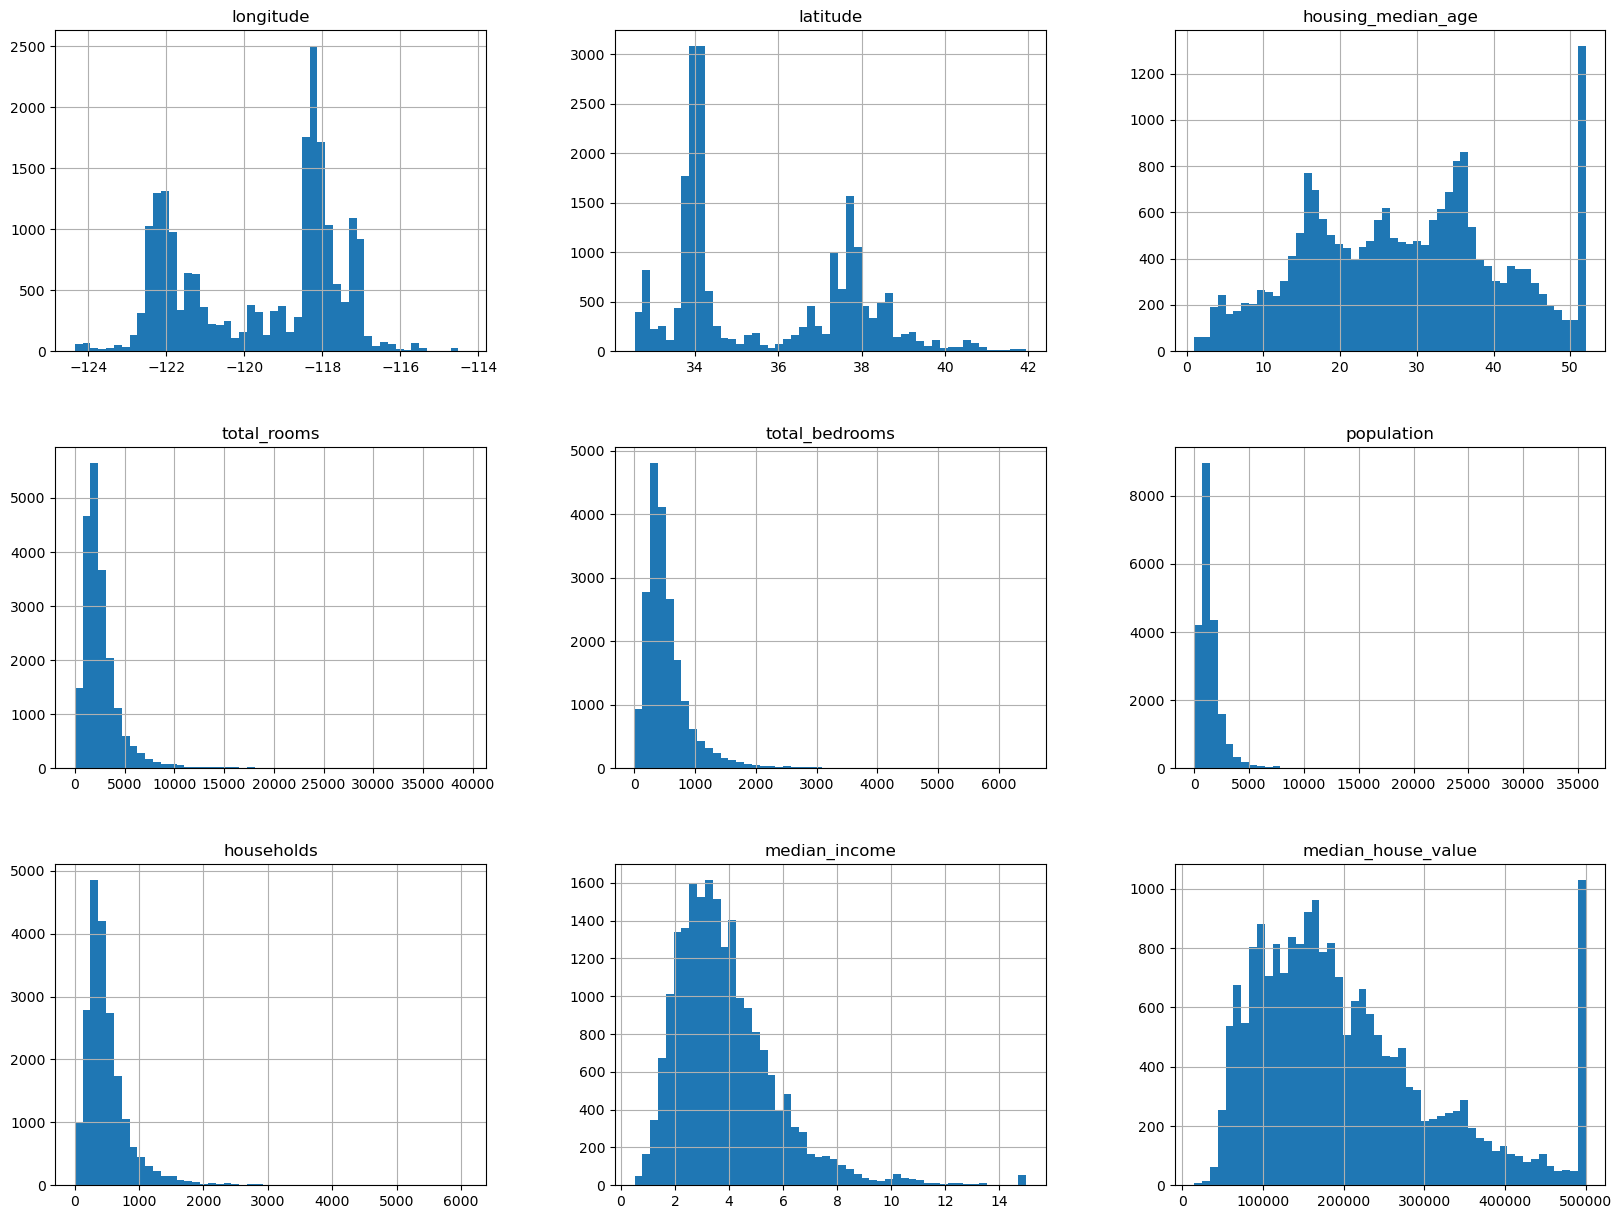

In [5]:
housing.hist(bins=50, figsize = (20,15))
plt.show()

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

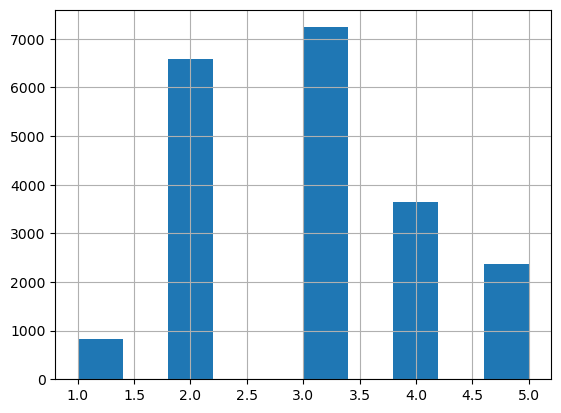

In [7]:
housing["income_cat"].hist()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [9]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [10]:
strat_train_set.shape

(16512, 10)

In [11]:
strat_test_set.shape

(4128, 10)

In [12]:
strat_train_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
1481,-122.04,37.96,28.0,1207.0,252.0,724.0,252.0,3.6964,165700.0,NEAR BAY
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,412300.0,<1H OCEAN
5830,-118.31,34.20,36.0,1692.0,263.0,778.0,278.0,5.0865,349600.0,<1H OCEAN
17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171,181300.0,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

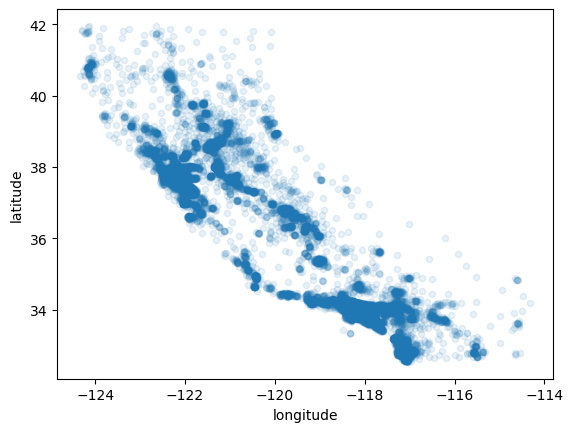

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

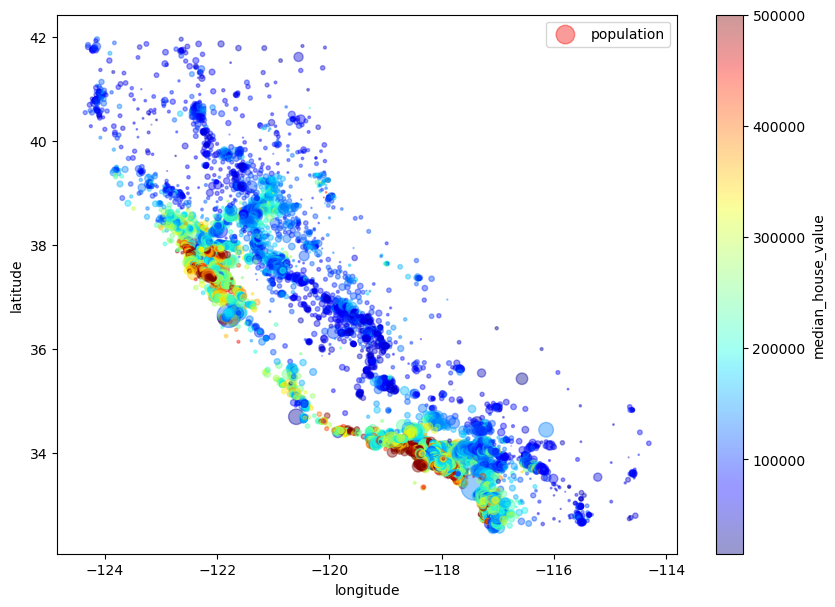

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend()

denser areas have higher median house value


In [15]:
housing.corr()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17304\1598269145.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [16]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

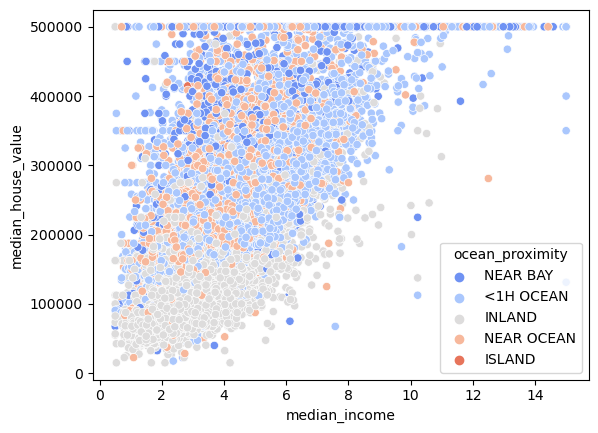

In [17]:
sns.scatterplot(x = housing['median_income'], y = housing['median_house_value'], hue = housing['ocean_proximity'], palette = 'coolwarm')

houses near Ocean and houses with less than one hour drive to ocean can be mapped to a single category


Maximum house value capped to 500000$

# Data Preprocessing

In [18]:
strat_train_set = strat_train_set.replace('<1H OCEAN', 'NEAR OCEAN')
strat_test_set = strat_test_set.replace('<1H OCEAN', 'NEAR OCEAN')

In [19]:
print(strat_train_set['ocean_proximity'].unique())
print(strat_test_set['ocean_proximity'].unique())

['INLAND' 'NEAR OCEAN' 'NEAR BAY' 'ISLAND']
['NEAR OCEAN' 'NEAR BAY' 'INLAND' 'ISLAND']


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

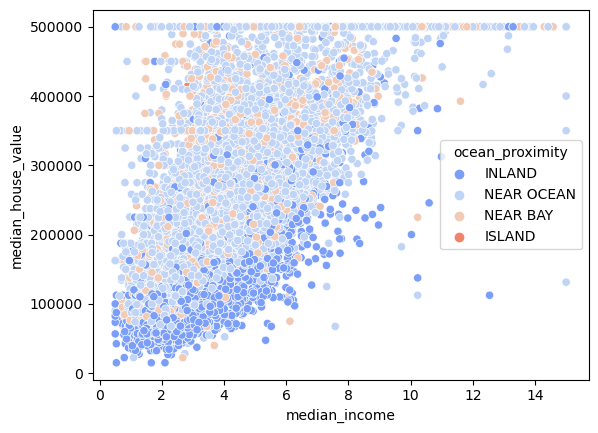

In [20]:
sns.scatterplot(x = strat_train_set['median_income'], y = strat_train_set['median_house_value'], hue = strat_train_set['ocean_proximity'], palette = 'coolwarm')

In [21]:
strat_train_set = strat_train_set.dropna()

In [22]:
strat_test_set = strat_test_set.dropna()

In [23]:
X_train = strat_train_set.drop('median_house_value', axis = 1)
y_train = strat_train_set['median_house_value']

X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value']

In [24]:
num_features = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
nominal_features = ["ocean_proximity"]

In [25]:
numerical_pipeline = Pipeline([("std scaler", StandardScaler())])
nominal_pipeline = Pipeline([ ("one hot encoding", OneHotEncoder() ) ])

In [26]:
pipeline = ColumnTransformer([
    ("numerical pipeline", numerical_pipeline, num_features),
    ("nominal pipeline", nominal_pipeline, nominal_features)
    
])

In [27]:
output_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "inland", "island", "near_Bay", "near_Ocean"]

In [28]:
X_train_tr = pipeline.fit_transform(X_train)
X_train_tr = pd.DataFrame(X_train_tr, columns=output_cols)

In [29]:
X_train_tr.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,inland,island,near_Bay,near_Ocean
0,-0.941593,1.347423,0.028467,0.583121,0.635123,0.733056,0.556800,-0.894571,1.0,0.0,0.0,0.0
1,1.171676,-1.192227,-1.720236,1.258713,0.775677,0.534096,0.721935,1.291743,0.0,0.0,0.0,1.0
2,0.267416,-0.125855,1.220765,-0.469719,-0.545045,-0.674003,-0.524573,-0.526273,1.0,0.0,0.0,0.0
3,1.221635,-1.351248,-0.368965,-0.348794,-0.038567,-0.466977,-0.037156,-0.866846,0.0,0.0,0.0,1.0
4,0.437277,-0.635656,-0.130506,0.425779,0.269198,0.374570,0.221201,0.325107,0.0,0.0,0.0,1.0
5,-1.231356,1.085507,-0.051019,-0.661611,-0.685599,-0.622919,-0.652420,-0.094965,0.0,0.0,1.0,0.0
6,-1.226360,0.790851,-0.448452,0.745599,0.329782,0.325278,0.383674,1.895071,0.0,0.0,0.0,1.0
7,0.632118,-0.673072,0.584873,-0.435169,-0.658943,-0.574523,-0.583169,0.634962,0.0,0.0,0.0,1.0
8,-1.186393,0.762789,-0.925371,-0.604183,-0.639556,-0.906123,-0.636439,-1.134274,0.0,0.0,0.0,1.0
9,0.647105,-0.757259,0.028467,-0.984700,-0.741336,1.139042,-0.745642,-1.773413,0.0,0.0,0.0,1.0


In [30]:
X_test_tr = pipeline.transform(X_test)
X_test_tr = pd.DataFrame(X_test_tr, columns=output_cols)

In [31]:
X_test_tr.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,inland,island,near_Bay,near_Ocean
0,0.592150,-0.710489,0.028467,1.784899,1.156142,0.685556,1.233324,2.312674,0.0,0.0,0.0,1.0
1,-0.422019,-0.350354,-0.368965,-0.282028,-0.552315,-0.505515,-0.569852,0.594740,0.0,0.0,0.0,1.0


# Model Training and Testing

In [32]:
# ML

def generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test):
    width = 116
    print("_"*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name", "Train Error", "Test Error", "Train Accuracy", "Test Accuracy"))
    print("_"*width)
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(y_train, y_hat_train)
        test_error = rmse(y_test, y_hat_test)
        train_accuracy = r2_score(y_train, y_hat_train)
        test_accuracy = r2_score(y_test, y_hat_test)
        model_name = str(model)
        print(row.format(model_name, train_error, test_error, train_accuracy*100, test_accuracy*100))
        print("-"*width)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]

In [35]:
generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
|      LinearRegression()      |      68993.73      |      67259.92      |       64.49        |       65.21        |
--------------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |      69099.06      |      67556.58      |       64.38        |       64.90        |
--------------------------------------------------------------------------------------------------------------------
|            SVR()             |     118632.98      |     116669.95      |       -4.99        |       -4.69        |
----------------------------------------------------------------

Random Forest Regressor giving the best train and test accuracy

# Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

params = [
    {
        "n_estimators": [200, 300],
        "max_depth": [25], 
        "min_samples_split": [10], 
        "max_features": [7]
    }
]

In [55]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, scoring="r2")

In [56]:
grid_search.fit(X_train_tr, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [25], 'max_features': [7],
                          'min_samples_split': [10],
                          'n_estimators': [200, 300]}],
             scoring='r2')

In [57]:
grid_search.best_score_

0.8156069554939036

In [58]:
best_model = grid_search.best_estimator_
print(best_model)

RandomForestRegressor(max_depth=25, max_features=7, min_samples_split=10,
                      n_estimators=200)


In [67]:
params = [
    {
        "n_estimators": [220],
        "max_depth": [30, 40], 
        "min_samples_split": [10], 
        "max_features": [7]
    }
]

In [68]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, scoring="r2")
grid_search.fit(X_train_tr, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [30, 40], 'max_features': [7],
                          'min_samples_split': [10], 'n_estimators': [220]}],
             scoring='r2')

In [69]:
grid_search.best_score_

0.8156383583857532

In [70]:
best_model = grid_search.best_estimator_
print(best_model)

RandomForestRegressor(max_depth=40, max_features=7, min_samples_split=10,
                      n_estimators=220)


In [72]:
def generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test):
    width = 116
    print("_"*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name", "Train Error", "Test Error", "Train Accuracy", "Test Accuracy"))
    print("_"*width)
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(y_train, y_hat_train)
        test_error = rmse(y_test, y_hat_test)
        train_accuracy = r2_score(y_train, y_hat_train)
        test_accuracy = r2_score(y_test, y_hat_test)
        model_name = str(model)
        print(model_name, end="\n\n")
        print(row.format("", train_error, test_error, train_accuracy*100, test_accuracy*100))
        print("-"*width)

In [89]:
models  = [RandomForestRegressor(max_depth = 30, max_features=7, min_samples_split=10,
                      n_estimators=250), RandomForestRegressor(max_depth = 30, max_features=7, min_samples_split=10,
                      n_estimators=220)]

In [90]:
generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
RandomForestRegressor(max_depth=30, max_features=7, min_samples_split=10,
                      n_estimators=250)

|                              |      28716.91      |      46928.88      |       93.85        |       83.06        |
--------------------------------------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=30, max_features=7, min_samples_split=10,
                      n_estimators=220)

|                              |      28841.50      |      47243.70      |       93.79        |       82.83        |
--------------------------------------------------------------------

In [133]:
reg = RandomForestRegressor(max_depth = 30, max_features=7, min_samples_split=10, n_estimators=250)
reg.fit(X_train_tr, y_train)

RandomForestRegressor(max_depth=30, max_features=7, min_samples_split=10,
                      n_estimators=250)

In [134]:
predictions = reg.predict(X_test_tr)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='median_house_value'>

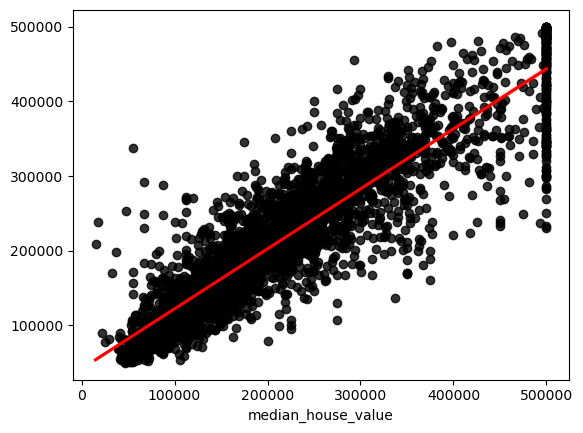

In [135]:
#plotting the predicted values against actual values

sns.regplot(y_test,predictions, scatter_kws= {'color': 'black'}, line_kws= {'color': 'red'})

In [136]:
# Sklearn regression model evaluation functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [137]:
# MAE
mean_absolute_error(y_test, predictions)

31331.85124500279

In [138]:
# RMSE
sqrt(mean_squared_error(y_test, predictions))

47040.113337881965

In [139]:
# R-Squared
r2_score(y_test, predictions)

0.8298108479324162

In [140]:
accuracy = (r2_score(y_test, predictions))*100
print(f'accuracy: {accuracy}')

accuracy: 82.98108479324162
